# Loan Investment Sweet Spot

Script to find the right balance b/w loan and the investment. We'll be using following inputs:
1. loan_interest - interest charged by the loan.
2. tax_reimbursement_max_interest_limit - Govt give a tax savings on loan interest till a given amount. Assuming that tax is 30% of a person's income, govt doesn't charge tax for the money paid as loan interest till a given limit.
3. investment_returns - Returns if the money was invested for an investment
4. emi_amount - amount to be paid monthly
5.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import pyinputplus as pyip
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
def get_user_input():
  loan_variables = {}
  loan_variables["loan_amount"] = pyip.inputNum("Enter loan amount: ",
    greaterThan = 0)
  print(loan_variables["loan_amount"])

  loan_variables["loan_interest_rate"] = pyip.inputNum("Enter loan interest"+\
    " rate(%): ", min = 0, lessThan = 100)
  print(loan_variables["loan_interest_rate"])

  loan_variables["emi_monthly"] = pyip.inputNum("Monthly EMI to be paid: ",
    greaterThan = 0)
  print(loan_variables["emi_monthly"])
  return loan_variables

loan_variables = get_user_input()

Enter loan amount: 7500000
Enter loan interest rate(%): 9.55
Monthly EMI to be paid: 97254


Get emi_breakdown for a given month
Its a recursive function which will return a list of dictonary containing
loan balance, emi paid, monthly interest, principal paid,

In [15]:
def get_emi_breakdown(loan_balance, loan_interest_rate, emi):

  monthly_statement = {}
  monthly_statement["loan_balance"] = loan_balance

  monthly_interest = (loan_balance * loan_interest_rate)/(100*12)
  monthly_statement["monthly_interest"] = monthly_interest

  if loan_balance + monthly_interest <= emi:
    emi_paid = loan_balance + monthly_interest
    monthly_statement["emi_paid"] = emi_paid
    monthly_statement["principal_paid"] = loan_balance
    return [monthly_statement]

  principal_paid = emi - monthly_interest
  outstanding_loan = loan_balance - principal_paid
  monthly_statement["emi_paid"] = emi
  monthly_statement["principal_paid"] = principal_paid

  return [monthly_statement] + \
    get_emi_breakdown(outstanding_loan, loan_interest_rate, emi)

In [11]:
print(loan_variables)

{'loan_amount': 7500000, 'loan_interest_rate': 9.55, 'emi_monthly': 97254}


In [16]:
loan_statement_sheet = get_emi_breakdown(loan_variables["loan_amount"], loan_variables["loan_interest_rate"], loan_variables["emi_monthly"])

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# create dataframe
df = pd.DataFrame(loan_statement_sheet)
print(df)

     loan_balance  monthly_interest   emi_paid  principal_paid
0    7500000.0000        59687.5000 97254.0000      37566.5000
1    7462433.5000        59388.5333 97254.0000      37865.4667
2    7424568.0333        59087.1873 97254.0000      38166.8127
3    7386401.2205        58783.4430 97254.0000      38470.5570
4    7347930.6636        58477.2815 97254.0000      38776.7185
..            ...               ...        ...             ...
115   474795.9140         3778.5841 97254.0000      93475.4159
116   381320.4981         3034.6756 97254.0000      94219.3244
117   287101.1738         2284.8468 97254.0000      94969.1532
118   192132.0206         1529.0507 97254.0000      95724.9493
119    96407.0713          767.2396 97174.3109      96407.0713

[120 rows x 4 columns]


In [23]:
pd.options.display.float_format = '{:.4f}'.format

<AxesSubplot: >

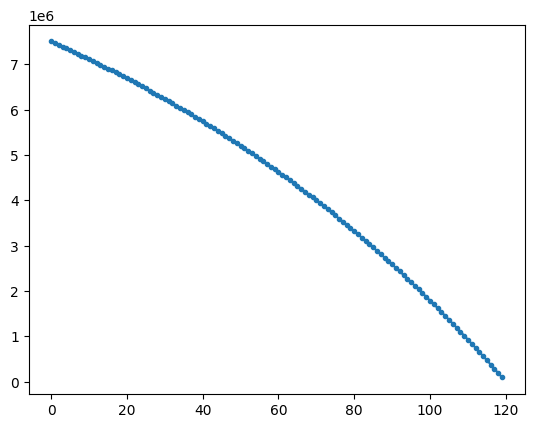

In [24]:
df['loan_balance'].plot(style='.-')

<AxesSubplot: >

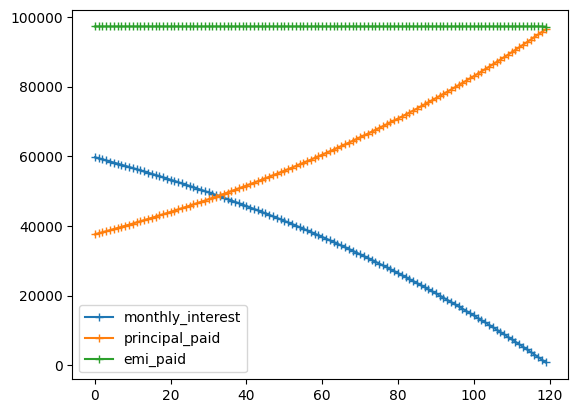

In [29]:
df[['monthly_interest', 'principal_paid', 'emi_paid']].plot(style='+-')